# CUNY MSDS DATA622 - Machine Learning & Big Data

## Homework #2 : Decision Tree and Classification or Regression problem
### Dataset : National Institute of Diabetes and Digestive and Kidney Diseases

### Ramnivas Singh
---------------------

__Summary__

Based on the latest topics presented, bring a dataset of your choice and create a Decision Tree where you can solve a classification or regression problem and predict the outcome of a particular feature or detail of the data used.
Switch variables to generate 2 decision trees and compare the results. Create a random forest for regression and analyze the results.

Based on real cases where desicion trees went wrong, and 'the bad & ugly' aspects of decision trees (https://decizone.com/blog/the-good-the-bad-the-ugly-of-using-decision-trees), how can you change this perception when using the decision tree you created to solve a real problem?

## EDA Summary

__Decision tree__ is a supervised machine learning model used to predict a target by learning decision rules from features. As the name suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions. It is a tree like structure constructed on the basis of attributes/features.

Decision tree algorithms are nothing but a series of if-else statements that can be used to predict a result based on the data set. This flowchart-like structure helps us in decision-making. The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until we reach a small enough set that contains data points that fall under one label. 

__Classification and Regression Tree (CART)__ The decision tree has two main categories classification tree and regression tree. These two terms at a time called as CART. A classification tree is an algorithm where the target variable is fixed or categorical. The algorithm is then used to identify the “class” within which a target variable would most likely fall.

A regression tree refers to an algorithm where the target variable is and the algorithm is used to predict its value. As an example of a regression type problem, you may want to predict the selling prices of a residential house, which is a continuous dependent variable.

---------

I will be using __National Institute of Diabetes and Digestive and Kidney Diseases__ This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. 

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

This dataset is picked up from 
 - https://www.kaggle.com/datasets/mathchi/diabetes-data-set?select=diabetes.csv
 - https://www.kaggle.com/datasets/mustafaali96/weight-height

# Load Packages

In [1]:
# Lets setup python environment and load python libraries for this EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Diabetes Analysis & Prediction
## Load Diabetes and Kidney Diseases Data

In [2]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Exploration

This dataset has following columns, few columns are unused, few are used as an inputs and treated as a feature.
Class variable (0 or 1) is expected outcome 

__Columns :__

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

<span style="font-size:16px;">
The dependent variable is if the patient is suffering from diabetes or not. Here the dependent column contains binary variable 1 indicating the person is suffering from diabetes and 0 he is not a patient of diabetes. The data set has independent variables as several physiological parameters of a diabetes patient. 

In [4]:
#descriptive statistics summary
diabetes_df.head() # printing first few rows of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df.tail()   # to show last few rows of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
diabetes_df.info() # for a quick view of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_df.sample(10)  # display a sample of 10 rows from the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
241,4,91,70,32,88,33.1,0.446,22,0
621,2,92,76,20,0,24.2,1.698,28,0
431,3,89,74,16,85,30.4,0.551,38,0
172,2,87,0,23,0,28.9,0.773,25,0
615,3,106,72,0,0,25.8,0.207,27,0
648,11,136,84,35,130,28.3,0.260,42,1
168,4,110,66,0,0,31.9,0.471,29,0
415,3,173,84,33,474,35.7,0.258,22,1
637,2,94,76,18,66,31.6,0.649,23,0
77,5,95,72,33,0,37.7,0.370,27,0


In [8]:
diabetes_df.describe()    # printing summary statistics of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
pd.isnull(diabetes_df)  # check for any null values in the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


The first eight columns contain the independent variables. These are some physiological variables having a correlation with diabetes symptoms. As we can see that the data frame contains nine variables in nine columns. The ninth column shows if the patient is diabetic or not. So, here the x stores the independent variables and y stores the dependent variable diabetes count.

In [10]:
x=diabetes_df.iloc[:,:-1].values
y=diabetes_df.iloc[:,-1].values

<AxesSubplot:>

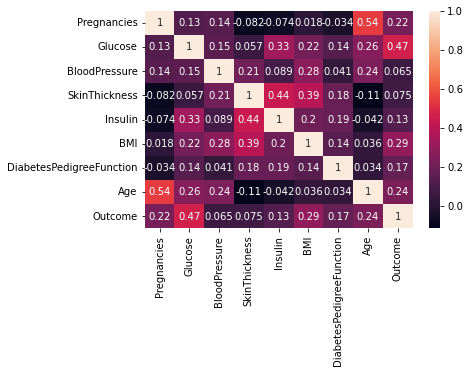

In [11]:
corr=diabetes_df.corr() 
sns.heatmap(corr, annot=True) # an array of the same shape as data which is used to annotate the heatmap

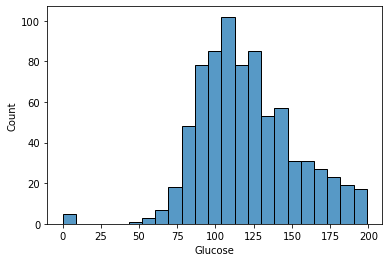

In [12]:
ax = sns.histplot(diabetes_df["Glucose"])
plt.show() # Plot histogram to show distributions of dataset

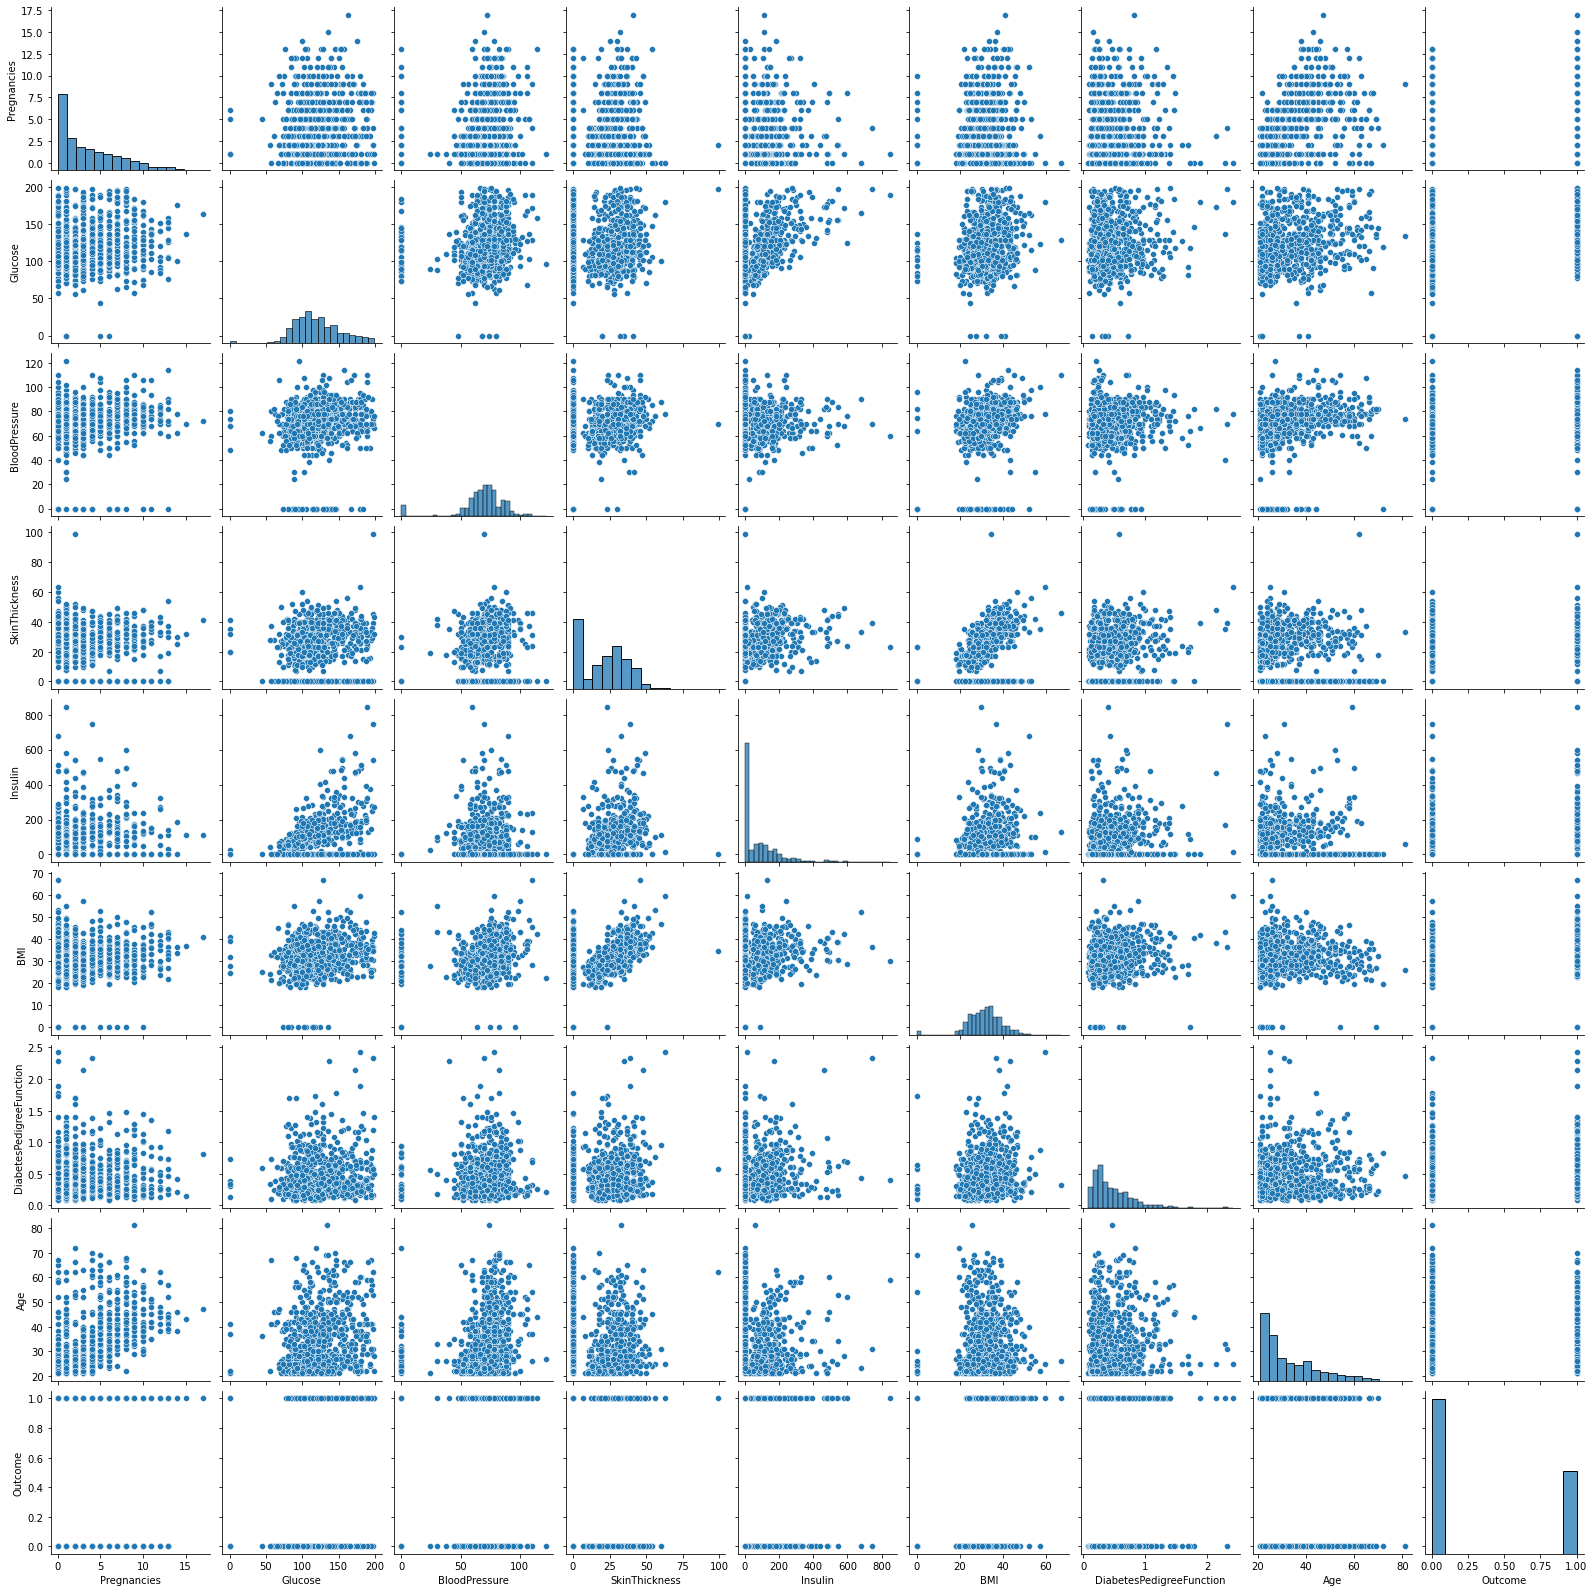

In [13]:
sns.pairplot(diabetes_df)

Fitting the Decision Tree Regression Model to the dataset Create the Decision Tree regressor object. To do the classification we need to import the DecisionTreeClassifier() from sklearn. This special classifier is capable of classifying binary variable i.e. variable with only two classes as well as multiclass variables.

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

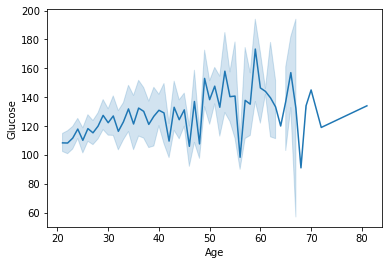

In [14]:
sns.lineplot(data=diabetes_df, x="Age", y="Glucose") # plot to see the rent trend

In [15]:
# Use of the classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

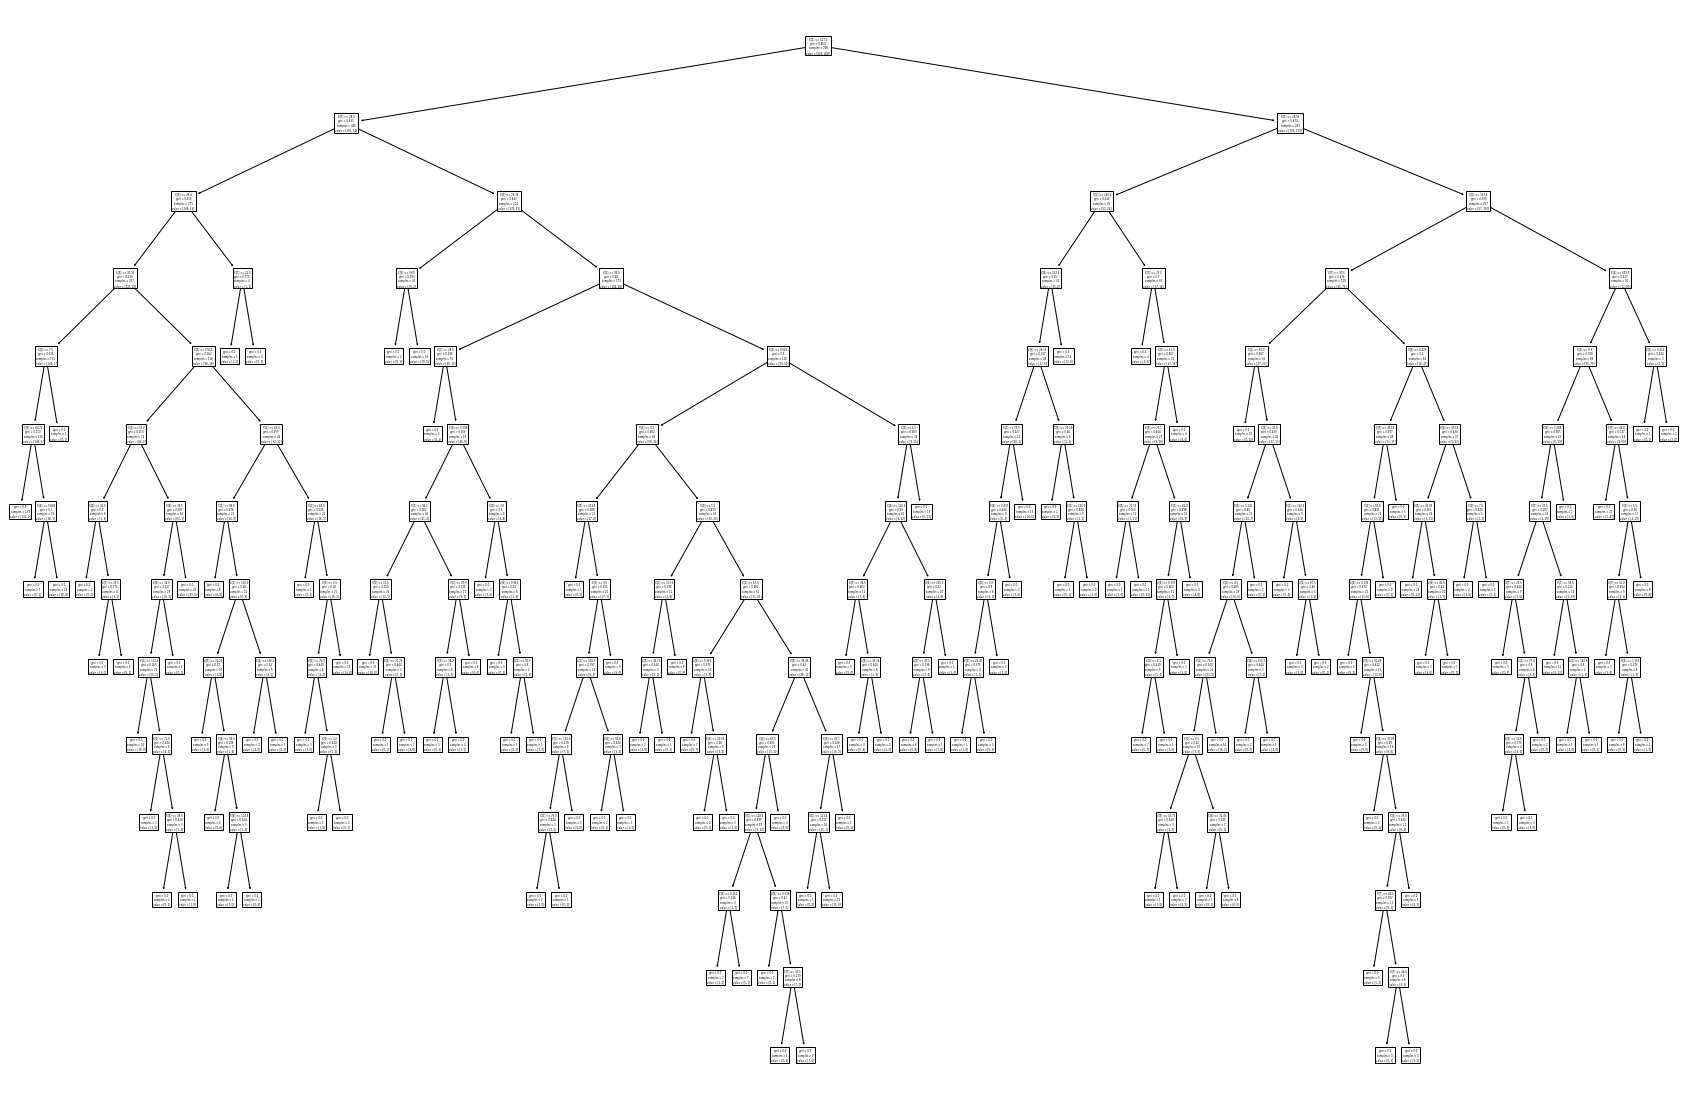

In [16]:
plt.figure(figsize=(30,20))
tree.plot_tree(clf)
plt.show()

Resolutuion is not looking great, lets try something else. A high resolution and quality image of the tree is to use Graphviz format importing export_graphviz() from tree.

In [17]:
import os
os.environ["PATH"] += os.pathsep + 'C:/DataScience/Softwares/Graphviz/bin'

# Creating better graph
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("diabetes") 

'diabetes.pdf'

## Perform regression using decision 

The dataset contains the height and weight of persons and a column with their genders. The original dataset has more than thousands of rows. Additional to the basic libraries we imported in a classification problem, here we will need to import the DecisionTreeRegressor() from sklearn.

In [18]:
wt_ht_df=pd.read_csv('weight-height.csv')
wt_ht_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [19]:
wt_ht_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### Create Variables 
As we can see that the dataframe contains three variables in three columns. The last two columns are only of our interest. We want to regress the weight of a person using the height of him/her. So, here the independent variable height is x and the dependent variable weight is y.

In [20]:
x=wt_ht_df.iloc[:,1:2].values
y=wt_ht_df.iloc[:,-1].values

### Splitting the dataset
Here we have set the test_size as 20% that means the training data set will consist 80% of the total data. This is a common practice of splitting the whole data set for creating training and testing data set. The test data set works as an independent data set when need to test the classifier after it gets trained with training data.

In [21]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=0)

### Fitting the decision tree regression
We have here fitted decision tree regression with two different depth values two draw a comparison between them.

In [22]:
# Creating regression models with two different depths
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

### Prediction
The below line of codes will give predictions from both the regression models with two different depth values using a new independent variable set X_test.

In [23]:
# Making prediction
X_test = np.arange(50,75, 0.5)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

### Visualizing prediction performance
The below line of codes will generate a height vs weight scattered plot alongwith two prediction lines created from two different regression models.

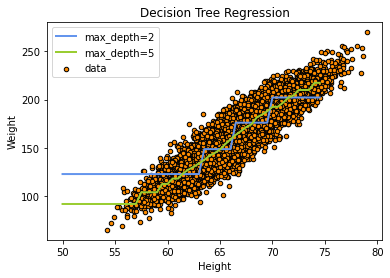

In [24]:
# Plot the results
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Reduced Data & Switched Variables
The dataset contains the height and weight of persons and a column with their genders. The original dataset has more than thousands of rows, but for this regression purpose, I have used only the first 100 rows containing data on 50 male and 50 females.

In [25]:
wt_ht_df=pd.read_csv('weight-height1.csv')
wt_ht_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [26]:
x=wt_ht_df.iloc[:,1:2].values
y=wt_ht_df.iloc[:,-1].values

In [27]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=0)

In [28]:
# Creating regression models with two different depths
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [29]:
# Making prediction
X_test = np.arange(50,75, 0.5)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

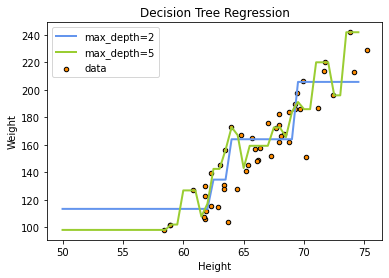

In [30]:
# Plot the results
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Random forest for regression


In [31]:
diabetes_df["Glucose"]=diabetes_df["Glucose"].fillna(0)
diabetes_df["BloodPressure"]=diabetes_df["BloodPressure"].fillna(0)
diabetes_df["SkinThickness"]=diabetes_df["SkinThickness"].fillna(0)
diabetes_df["Insulin"]=diabetes_df["Insulin"].fillna(0)
diabetes_df["BMI"]=diabetes_df["BMI"].fillna(0)
diabetes_df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [32]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
x=pd.DataFrame(diabetes_df,columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
y=diabetes_df.Outcome.values.reshape(-1,1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
clf=RandomForestClassifier(n_estimators=150,max_depth=3)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7835497835497836


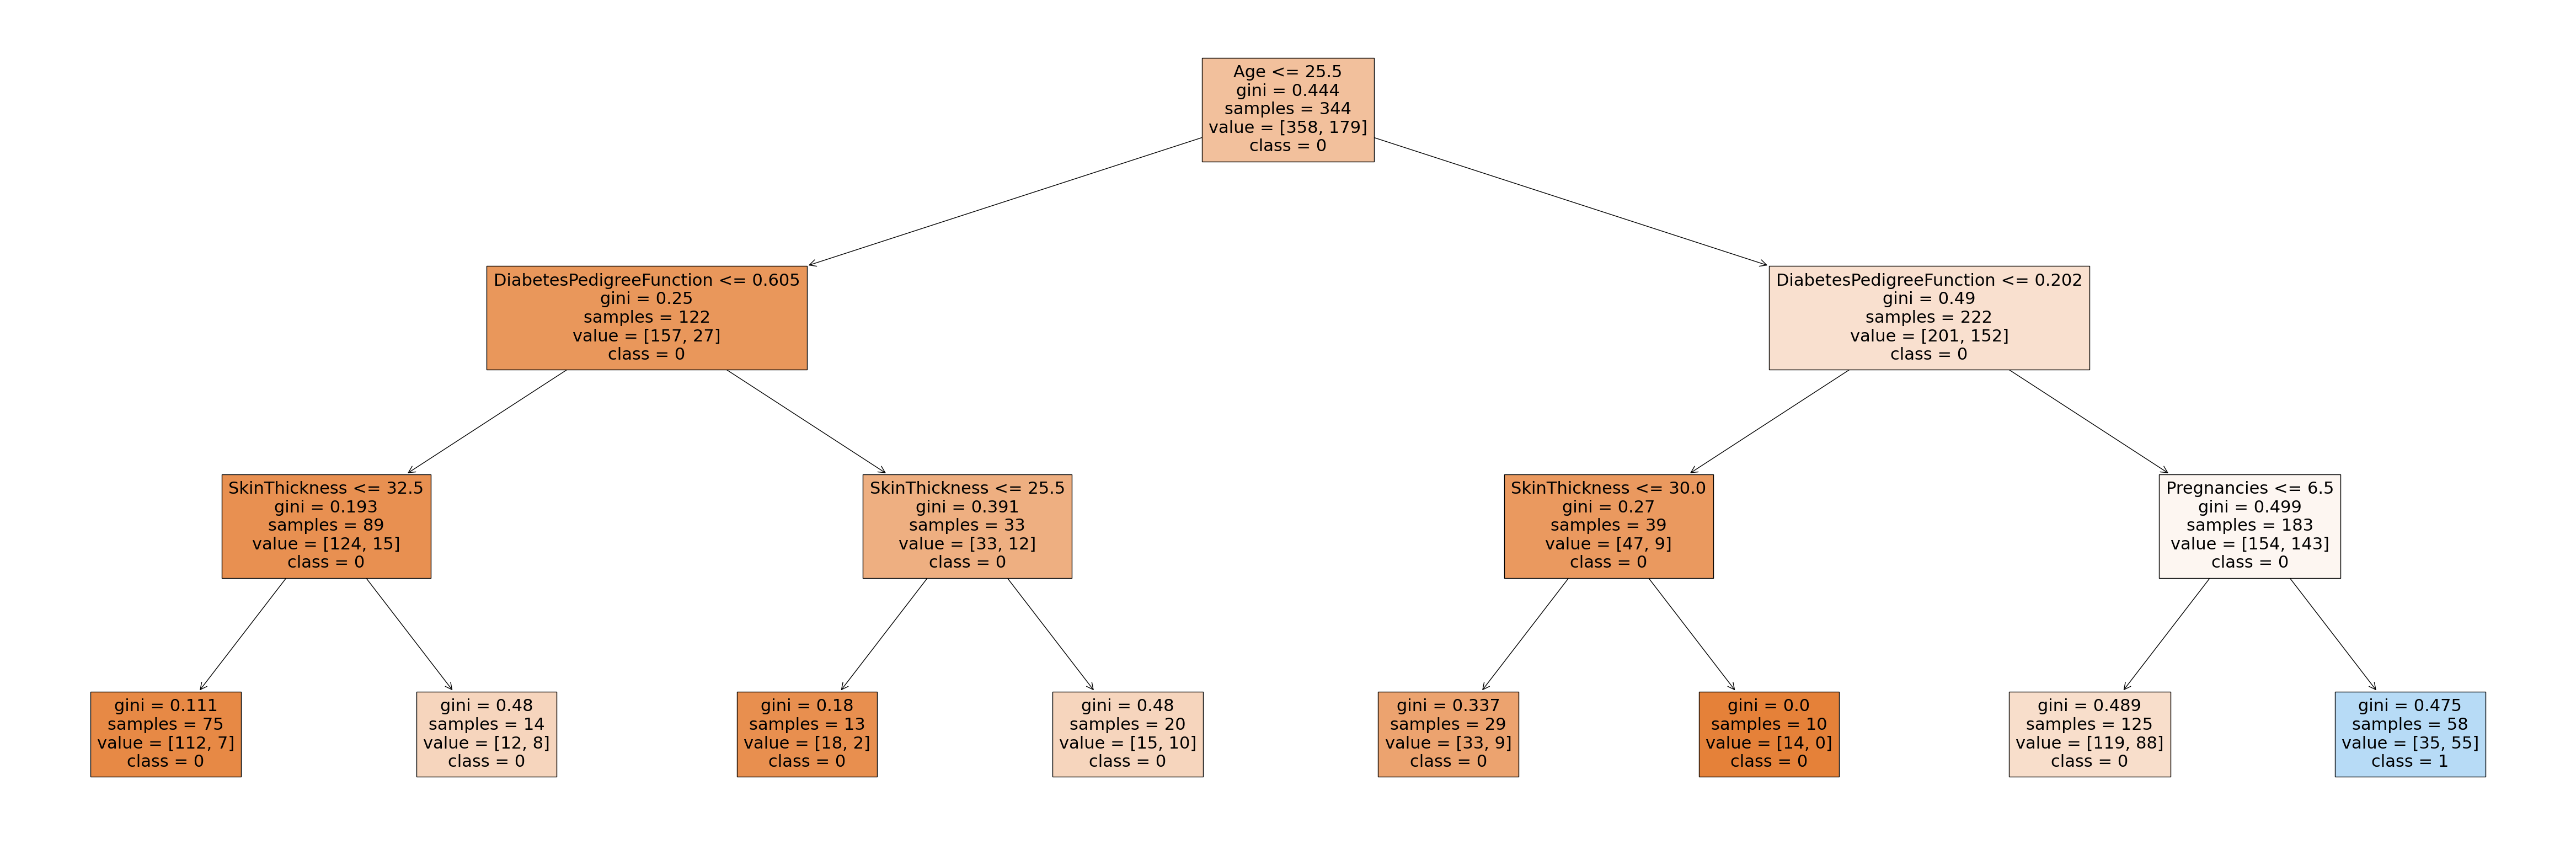

<Figure size 2160x1440 with 0 Axes>

In [35]:
f_n=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
t_n=["0","1"]
fig=plt.figure(figsize=(60,20),dpi=100)
plot=tree.plot_tree(clf.estimators_[5],feature_names=f_n,class_names=t_n,filled=True)
plt.figure(figsize=(30,20))
plt.show()
fig.savefig("Tree1.png")

## Conclusion

As we can see in the resulting plot, the decision tree of depth 2 captures the general trend in the data. It is important to know how to choose an appropriate value for a depth of a tree to not overfit or underfit the data. Knowing how to combine decision trees to form an ensemble random forest is also useful as it usually has a better generalization performance than an individual decision tree due to randomness, which helps to decrease the model’s variance. It is also less sensitive to outliers in the dataset and doesn’t require much parameter tuning. 

- We built a machine learning-based classifier that predicts if a patient is diabetic or not, based on the information provided in the database.
- While building this predictor, we learned about common preprocessing steps such as feature scaling and imputing missing values. For more detailed explanation about handling missing values in python, please refer to my article here.
- We implemented Random forest algorithm, evaluated the performance using the accuracy score, comparing the performance between train and test data.


## References 
https://scikit-learn.org/stable/modules/tree.html

https://www.bu.edu/sph/files/2014/05/MorganCART.pdf
